In [1]:
## CNN MODELING OF Brain Tumour

In [2]:
# vgg16
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.applications.vgg16 import VGG16
from glob import glob
from keras.models import Model
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.losses import binary_crossentropy
physical_devices = tf.config.experimental.list_physical_devices('GPU')
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [3]:
#finding number of individual files in train folder
folders = glob("D:\\subi\\data\\Brain Tumor Data Set\\Train\\*")
print(len(folders))

2


In [4]:
file_path_train="D:/subi/data/Brain Tumor Data Set/Train"
file_path_test="D:/subi/data/Brain Tumor Data Set/Test"
img_size = 224
target_size = (img_size, img_size)
case_of_image = {
    0:"Brain Tumor", 1: "Healthy"
}
filters = 8
pool_size = (2, 2)
kernel_size = (3, 3)
batch_size = 64
activation = "relu"
rate = 0.25
optimizer = "adam"
epochs=40

In [5]:
f=glob("D:/subi/data/Brain Tumor Data Set/Test/*")


In [6]:
# using Imagedatagenerator to scale normalize the images and generating more images from existing ones
from keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(rescale = 1.0/255, validation_split = 0.3)

test_datagen = ImageDataGenerator(rescale = 1./255)
train_gen = data_gen.flow_from_directory(
    file_path_train,
    target_size = target_size,
    batch_size = batch_size,
    color_mode = "grayscale",
    shuffle = True,
    class_mode = "binary",
    subset = "training"
    
)
test_gen = data_gen.flow_from_directory( 
    file_path_test,
    target_size = target_size,
    batch_size = batch_size,
    color_mode = "grayscale",
    shuffle = False,
    class_mode = "binary",
    subset = "validation"
)

Found 2569 images belonging to 2 classes.
Found 278 images belonging to 2 classes.


In [7]:
model = Sequential()

In [8]:
input_shape = train_gen[0][0][0].shape
# CNN model, Extract the features from the images and build the model
model.add(Conv2D(filters=filters, kernel_size=kernel_size, input_shape=input_shape, activation=activation))

model.add(Conv2D(filters=filters * 2, kernel_size=kernel_size, activation=activation))
model.add(MaxPool2D(pool_size=pool_size))

model.add(Conv2D(filters=filters * 4, kernel_size=kernel_size, activation=activation))
model.add(MaxPool2D(pool_size=pool_size))

model.add(Conv2D(filters=filters * 8, kernel_size=kernel_size, activation=activation))
model.add(MaxPool2D(pool_size=pool_size))

model.add(Conv2D(filters=filters * 16, kernel_size=kernel_size, activation=activation))
model.add(MaxPool2D(pool_size=pool_size))

model.add(Dropout(rate=rate))
model.add(Flatten())
model.add(Dense(units=filters*8, activation=activation))

model.add(Dropout(rate=rate))
model.add(Dense(units=filters//8, activation='sigmoid'))

In [9]:
model.compile(loss=binary_crossentropy, optimizer=optimizer, metrics=['accuracy'])

In [10]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
es = EarlyStopping(monitor='val_accuracy', patience=4, min_delta=0.01, verbose=1, mode='auto')
mcp = ModelCheckpoint(monitor='val_accuracy', verbose=1, mode='auto', filepath='Brain Tumor.h5')
em = [es, mcp]
r = model.fit(
    train_gen,
    steps_per_epoch=(train_gen.samples // batch_size) ,
    epochs=epochs,
    validation_data=test_gen,
    callbacks=em)

Epoch 1/40
40/40 [==============================] - ETA: 0s - loss: 0.5894 - accuracy: 0.6862
Epoch 1: saving model to Brain Tumor.h5
40/40 [==============================] - 56s 1s/step - loss: 0.5894 - accuracy: 0.6862 - val_loss: 0.6630 - val_accuracy: 0.6331
Epoch 2/40
40/40 [==============================] - ETA: 0s - loss: 0.4028 - accuracy: 0.8136
Epoch 2: saving model to Brain Tumor.h5
40/40 [==============================] - 4s 100ms/step - loss: 0.4028 - accuracy: 0.8136 - val_loss: 0.8313 - val_accuracy: 0.6367
Epoch 3/40
40/40 [==============================] - ETA: 0s - loss: 0.3289 - accuracy: 0.8563
Epoch 3: saving model to Brain Tumor.h5
40/40 [==============================] - 4s 103ms/step - loss: 0.3289 - accuracy: 0.8563 - val_loss: 0.4585 - val_accuracy: 0.7842
Epoch 4/40
40/40 [==============================] - ETA: 0s - loss: 0.2620 - accuracy: 0.8922
Epoch 4: saving model to Brain Tumor.h5
40/40 [==============================] - 4s 102ms/step - loss: 0.2620 - a

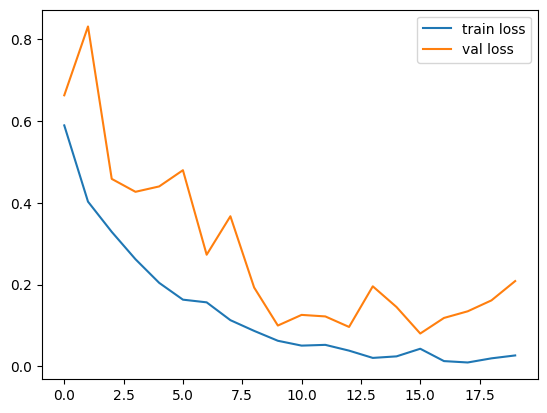

<Figure size 640x480 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

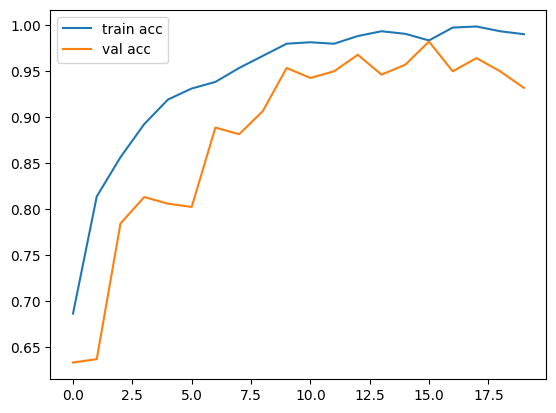

<Figure size 640x480 with 0 Axes>

In [12]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [13]:
import tensorflow as tf

from keras.models import load_model

model.save('brain.h5')